# 01 - Data Exploration 📊
**Project:** ADC Conjugation Technology Evaluation  
**Goal:** Explore and interpret synthetic or real-world ADC conjugation datasets to inform technology selection.

---

## 📌 About This Notebook

This notebook helps:
- Load and validate a dataset of ADC conjugation technology platforms
- Understand statistical distributions of attributes like DAR, stability, homogeneity
- Compare platforms across performance, cost, and manufacturability
- Generate plots and interpret key findings


In [7]:
# 📦 Setup
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Optional PDF support
try:
    import pdfkit
    from jinja2 import Template
except ImportError:
    print("📄 PDF generation optional. Run `pip install pdfkit jinja2` and install wkhtmltopdf.")


📄 PDF generation optional. Run `pip install pdfkit jinja2` and install wkhtmltopdf.


In [8]:
# 📂 Load Data

adc_conjugation_synthetic_advanced_url = "https://drive.google.com/file/d/1DV8tx5akh8WqB739Vd_Wft0YkPCt9R9j/view?usp=sharing"

def import_csv(url):
  path = "https://drive.google.com/uc?export=download&id=" + url.split("/")[-2]
  return pd.read_csv(path)

df = import_csv(adc_conjugation_synthetic_advanced_url)  # ✅ Load into df
df.head()


,Technology_Category,Platform,Vendor,DAR_Mean,DAR_Std,DAR_CV,Homogeneity,Stability_Score,Expression_Ease,Cost_Index,CMC_Risk,Scalability,Latency_to_Clinic_yrs,Approved_Usage
0,Random,Lysine-Based,Generic,4.20,0.15,0.04,0.27,0.74,0.74,0.32,Medium,0.95,4.95,"Adcetris, Kadcyla"
1,Random,Lysine-Based,Generic,3.89,0.17,0.04,0.42,0.71,0.24,0.87,Low,0.88,4.36,"Adcetris, Kadcyla"
2,Random,Lysine-Based,Generic,4.03,0.24,0.06,0.39,0.81,0.74,0.37,Medium,0.90,5.75,"Adcetris, Kadcyla"
3,Random,Lysine-Based,Generic,3.73,0.15,0.04,0.39,0.62,0.53,0.51,Medium,0.91,2.20,"Adcetris, Kadcyla"
4,Random,Lysine-Based,Generic,3.93,0.36,0.09,0.48,0.73,0.67,0.37,High,0.91,4.27,"Adcetris, Kadcyla"


## 🧬 1. Dataset Overview
- Dimensions
- Platform categories
- Basic structure


In [9]:
print("🔎 Rows:", df.shape[0], " | Columns:", df.shape[1])
print("\n🧪 Platforms:", df['Platform'].unique())
print("\n🏷️ Technology Categories:", df['Technology_Category'].unique())
df.describe()


🔎 Rows: 48  | Columns: 14

🧪 Platforms: ['Lysine-Based' 'Interchain Cysteine' 'GlycoConnect™' 'THIOMAB™'
 'DXd Linker-Payload' 'WuXiDAR4™']

🏷️ Technology Categories: ['Random' 'Site-Specific Non-Selective' 'Site-Specific Selective']


,DAR_Mean,DAR_Std,DAR_CV,Homogeneity,Stability_Score,Expression_Ease,Cost_Index,Scalability,Latency_to_Clinic_yrs
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,3.082708,0.218125,0.073542,0.784583,0.758542,0.627292,0.419375,0.705000,2.953125
std,0.662107,0.090640,0.032713,0.207999,0.082694,0.217791,0.221248,0.141872,1.365775
min,2.020000,0.070000,0.020000,0.270000,0.610000,0.200000,0.070000,0.420000,1.140000
25%,2.437500,0.147500,0.047500,0.705000,0.707500,0.482500,0.230000,0.597500,2.145000
50%,3.180000,0.225000,0.070000,0.860000,0.755000,0.645000,0.435000,0.700000,2.640000
75%,3.597500,0.290000,0.100000,0.960000,0.810000,0.810000,0.562500,0.807500,3.360000
max,4.200000,0.380000,0.160000,0.990000,0.960000,0.950000,0.870000,0.950000,7.240000


## 📈 2. Visual Summary of Platform & CMC Distribution


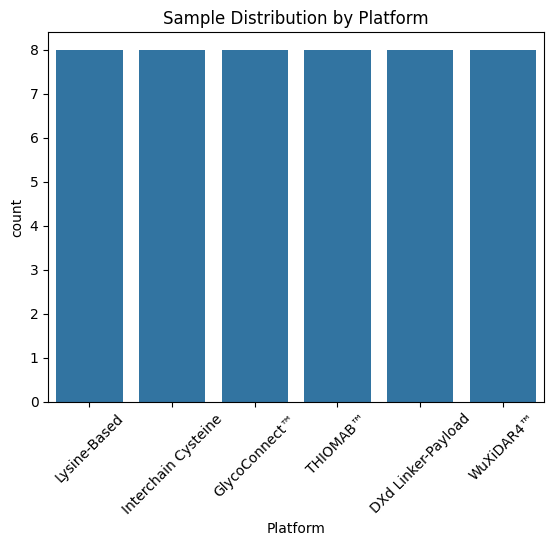

/tmp/ipython-input-10-2173307756.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="CMC_Risk", palette="Set2")


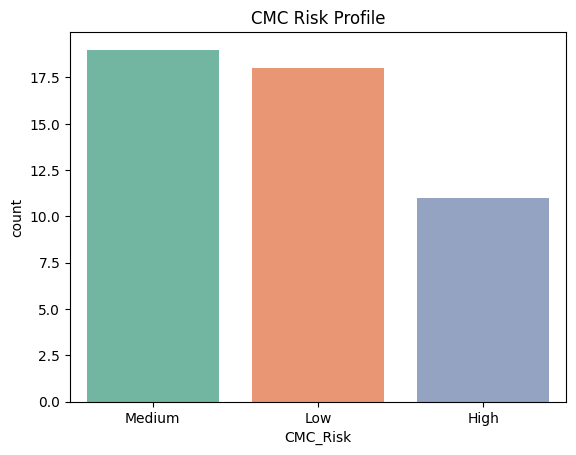

In [10]:
# Platform distribution
sns.countplot(data=df, x="Platform")
plt.xticks(rotation=45)
plt.title("Sample Distribution by Platform")
plt.show()

# CMC Risk
sns.countplot(data=df, x="CMC_Risk", palette="Set2")
plt.title("CMC Risk Profile")
plt.show()


## 🧮 3. Correlation Matrix
Check which features are strongly associated.


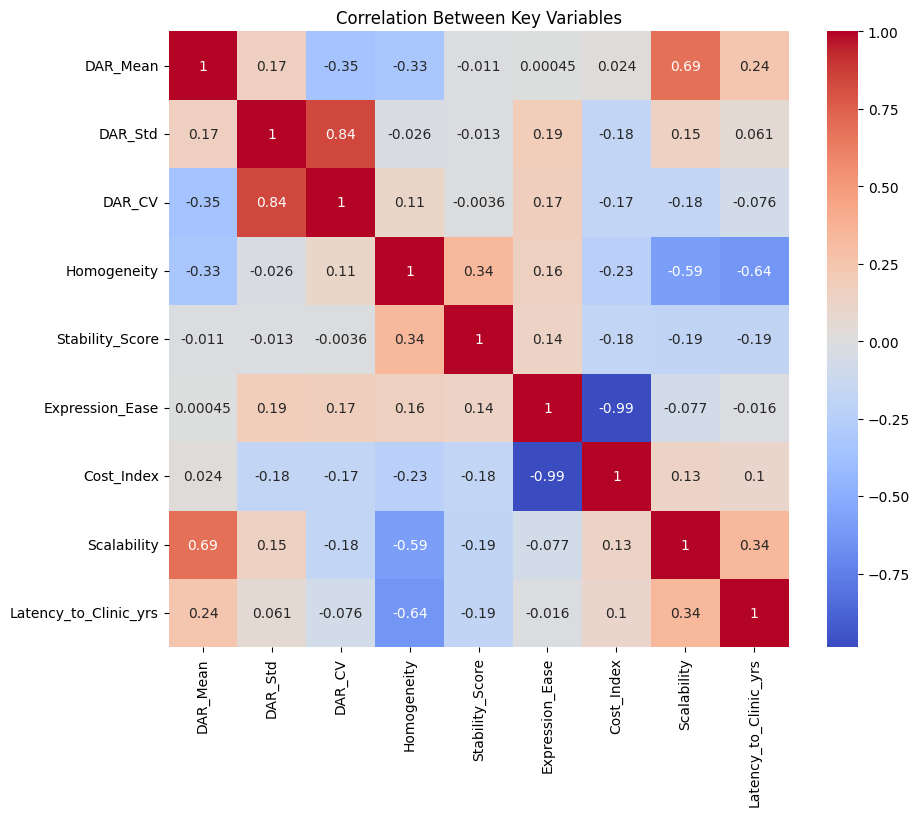

In [11]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Between Key Variables")
plt.show()


## 📊 4. Feature Distributions by Platform
### 4.1 DAR Mean


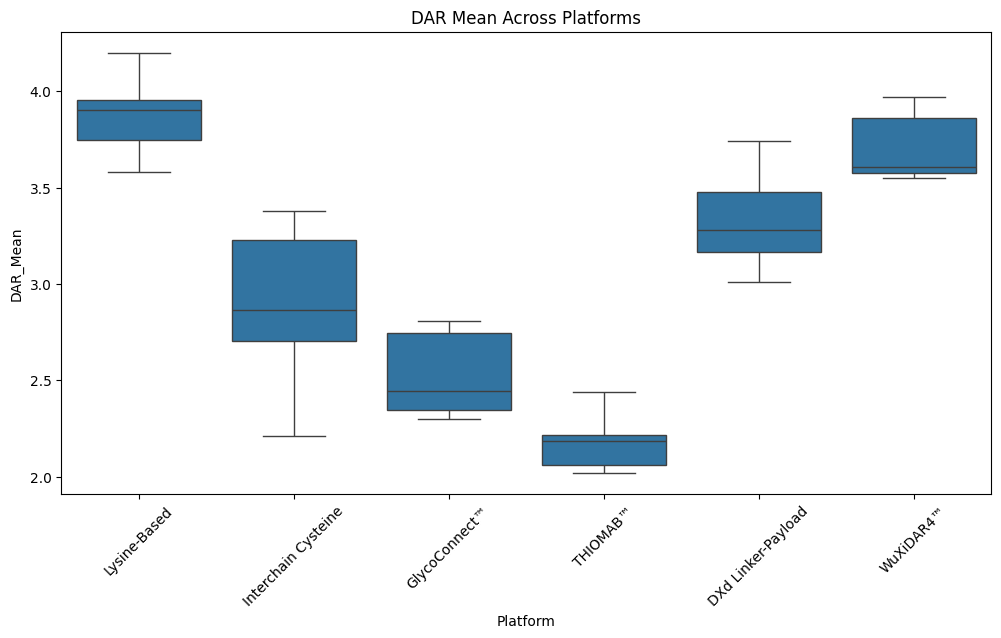

In [12]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="Platform", y="DAR_Mean")
plt.xticks(rotation=45)
plt.title("DAR Mean Across Platforms")
plt.show()


### 4.2 Expression Ease


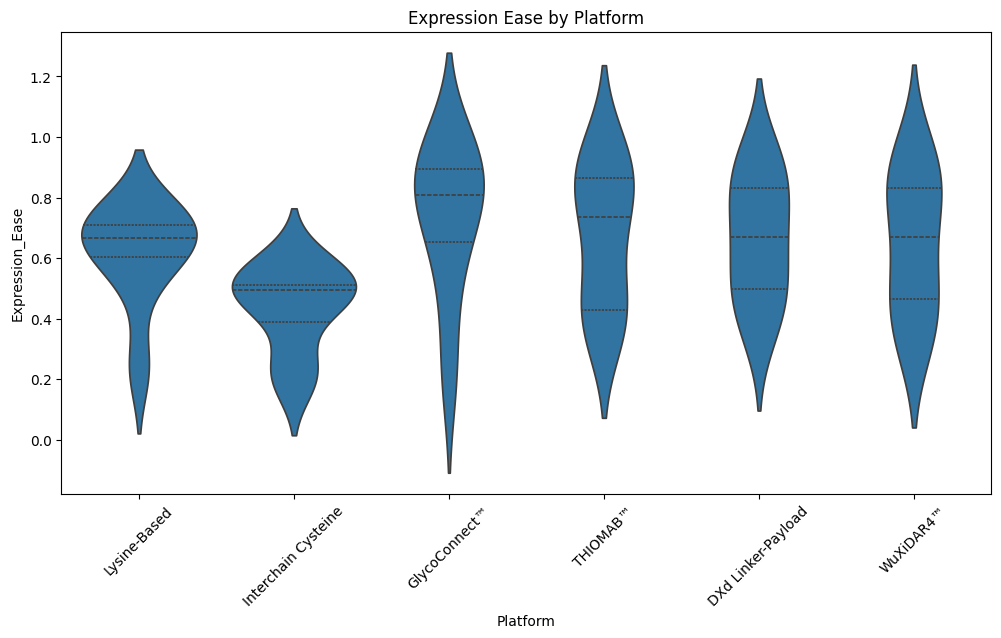

In [13]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x="Platform", y="Expression_Ease", inner="quartile")
plt.xticks(rotation=45)
plt.title("Expression Ease by Platform")
plt.show()


## 🧠 5. Interactive Plotly Chart
### DAR Mean vs Homogeneity, colored by Technology Category


In [14]:
fig = px.scatter(
    df, x="DAR_Mean", y="Homogeneity",
    color="Technology_Category", symbol="Platform",
    hover_data=["Vendor", "CMC_Risk", "Stability_Score", "Approved_Usage"]
)
fig.update_layout(title="DAR Mean vs Homogeneity by Platform")
fig.show()


## 📋 6. Grouped Summary Table
Mean values for key attributes per platform.


In [15]:
df.groupby("Platform")[["DAR_Mean", "Homogeneity", "Stability_Score", "Cost_Index", "Scalability"]].mean().round(2)


,DAR_Mean,Homogeneity,Stability_Score,Cost_Index,Scalability
Platform,,,,,
DXd Linker-Payload,3.33,0.94,0.80,0.36,0.58
GlycoConnect™,2.52,0.80,0.77,0.32,0.68
Interchain Cysteine,2.89,0.68,0.74,0.60,0.71
Lysine-Based,3.88,0.40,0.72,0.47,0.91
THIOMAB™,2.17,0.92,0.76,0.36,0.54
WuXiDAR4™,3.70,0.97,0.76,0.39,0.82


## 📤 (Optional) PDF Report Generation

If you'd like to export this exploration into a printable PDF report with charts and interpretation:

1. Run the report generator script (`04_generate_pdf_report.py`)  
2. Or call the script from here (after installing dependencies)

📌 Requires:
- `pdfkit` and `wkhtmltopdf`
- `jinja2` for HTML templating


In [16]:
# Optional: Call PDF generation script (if available in your repo)
# !python 04_generate_pdf_report.py
